In [2]:
# Start of question 1.a:
# Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing
# functions from scikit-learn. The provided data is already normalized (see description),
# so there is no need for additional normalization. Compute and display basic statistics
# (mean, standard deviation, min, max, etc.) for each of the variables in the data set.
# Separate the target attribute for regression.

In [8]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

In [6]:
cd csc478\communities

C:\Users\Shawn\csc478\communities


In [9]:
vs = pd.read_csv("communities.csv")

In [10]:
vs.describe(include = "all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [12]:
vs.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [44]:
communityData = np.genfromtxt("communities.csv", delimiter=",",dtype=float)
communityData.shape

(1995L, 100L)

In [45]:
communityData = np.delete(communityData, 0, 0) # Remove the head line
communityData.shape

(1994L, 100L)

In [46]:
target = communityData[:,-1] # ViolentCrimesPerPop is target data
target[0:5]

array([ 0.2 ,  0.67,  0.43,  0.12,  0.03])

In [47]:
communityData = np.delete(communityData, 0, 1) # Remove "state"
communityData = np.delete(communityData, 0, 1) # Remove "communityname"
communityData = np.delete(communityData, -1, 1) # Remove "ViolentCrimesPerPop"
communityData

array([[ 0.19,  0.33,  0.02, ...,  0.12,  0.26,  0.2 ],
       [ 0.  ,  0.16,  0.12, ...,  0.02,  0.12,  0.45],
       [ 0.  ,  0.42,  0.49, ...,  0.01,  0.21,  0.02],
       ..., 
       [ 0.16,  0.37,  0.25, ...,  0.08,  0.32,  0.18],
       [ 0.08,  0.51,  0.06, ...,  0.03,  0.38,  0.33],
       [ 0.2 ,  0.78,  0.14, ...,  0.11,  0.3 ,  0.05]])

In [48]:
communityData.shape

(1994L, 97L)

In [57]:
# Found that there is a value missing in the data
communityData[130][25]

nan

In [66]:
# Replace it with mean value of OtherPerCap
communityData[130][25] = (communityData[:130][25].sum() + communityData[131:][25].sum()) / 1993
communityData[130][25]

0.037772202709483192

In [49]:
# End of question 1.a.

# Start of question 1.b:
# Perform standard linear regression on data using the implementation for Ch. 8 of MLA.
# Compute the RMSE value on the full training data. Also, plot the correlation between
# the predicted and actual values of the target attribute. Display the obtained regression
# coefficients (weights). Finally, perform 10-fold cross-validation using the learned
# model and compare the final RMSE to the training RMSE (for cross validation, you may
# use the KFold module from sklearn.cross_validation).

In [67]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in communityData])
y = target

In [68]:
# First 3 elements of the data
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)
print x[:3]

[[ 0.19  0.33  0.02  0.9   0.12  0.17  0.34  0.47  0.29  0.32  0.2   1.    0.37  0.72  0.34  0.6   0.29  0.15  0.43
   0.39  0.4   0.39  0.32  0.27  0.27  0.36  0.41  0.08  0.19  0.1   0.18  0.48  0.27  0.68  0.23  0.41  0.68  0.4   0.75
   0.75  0.35  0.55  0.59  0.61  0.56  0.74  0.76  0.04  0.14  0.03  0.24  0.27  0.37  0.39  0.07  0.07  0.08  0.08
   0.89  0.06  0.14  0.13  0.33  0.39  0.28  0.55  0.09  0.51  0.5   0.21  0.71  0.52  0.05  0.26  0.65  0.14  0.06
   0.22  0.19  0.18  0.36  0.35  0.38  0.34  0.38  0.46  0.25  0.04  0.    0.12  0.42  0.5   0.51  0.64  0.12  0.26  0.2
   1.  ]
 [ 0.    0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  0.02  1.    0.31  0.72  0.11  0.45  0.25  0.29  0.39
   0.29  0.37  0.38  0.33  0.16  0.3   0.22  0.35  0.01  0.24  0.14  0.24  0.3   0.27  0.73  0.57  0.15  1.    0.63
   0.91  1.    0.29  0.43  0.47  0.6   0.39  0.46  0.53  0.    0.24  0.01  0.52  0.62  0.64  0.63  0.25  0.27  0.25
   0.23  0.84  0.1   0.16  0.1   0.17  0.29  0.17  0

In [69]:
# First 10 elements of the response variable
print y[:10]

[ 0.2   0.67  0.43  0.12  0.03  0.14  0.03  0.55  0.53  0.15]


In [70]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Let's see predictions for the first 10 instances
print linreg.predict(x[:10])

[ 0.17  0.29  0.38  0.32 -0.02  0.23  0.09  0.44  0.24  0.  ]


In [72]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print err[:10]

[ 0.03  0.38  0.05  0.2   0.05  0.09  0.06  0.11  0.29  0.15]


In [73]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

0.128875589759


In [74]:
# We can view the regression coefficients
print 'Regression Coefficients: \n', linreg.coef_

Regression Coefficients: 
[ 0.13 -0.03  0.21 -0.04 -0.01  0.06  0.12 -0.22 -0.15  0.05 -0.24  0.05 -0.2  -0.21  0.05 -0.18  0.06  0.01 -0.09  0.27
  0.1  -0.33 -0.03 -0.04  0.02  0.04  0.03  0.13 -0.19 -0.1   0.06  0.11  0.    0.23 -0.04 -0.01  0.47  0.23  0.17 -0.58
 -0.14  0.06 -0.35 -0.04  0.    0.06 -0.18 -0.15  0.13 -0.14  0.02  0.03 -0.07  0.04 -0.03 -0.22  0.45 -0.2  -0.03 -0.14
  0.06 -0.21  0.65 -0.08 -0.25 -0.67  0.2   0.1   0.03  0.17 -0.04  0.55  0.05 -0.08 -0.03  0.01 -0.01 -0.35  0.27  0.01
 -0.24 -0.03 -0.07  0.37  0.04 -0.04 -0.08  0.13  0.18  0.13  0.   -0.02  0.03  0.01  0.03 -0.01 -0.04  0.  ]


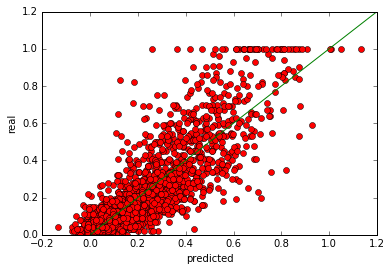

In [78]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [79]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [80]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


In [81]:
# End of question 1.b

# Start of question 1.c:
# Feature Selection: use the scikit-learn regression model from sklearn.linear_model
# with a subset of features to perform linear regression. For feature selection,
# write a script or function to takes as input the training data and target attribute,
# the model, and any other parameters you find necessary, and returns the optimal
# percentage of the most informative features to use. Your approach should use k-fold
# cross-validation on the training data (you can use k=5). You can use feature_selection.
# SelectPercentile to find the most informative variables. Show the list of most
# informative variables and their weights [Note: since this is regression not 
# classification, you should use feature_selection.f_regression as scoring function
# rather than chi2). Next, plot the model's mean absolute error values on cross-validation
# relative to the percentage of selected features (See scikit-learn's
# metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with
# regression you'll need to pass to it scoring='mean_absolute_error' as a parameter.
# Once, you have determined the best set of features, run the model with that feature
# subset on the set-aside test data. [Hint: for an example of a similar feature selection
# process please review the class example notebook. Also, review scikit-learn
# documentation for feature selection.]

In [82]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
